In [2]:
#!pip install pykml 

In [1]:
import cv2
from pykml import parser
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!ls ../../../campaign0/goprosamples/

19022020_Adour_3_short.mp4


In [3]:
base_file = "../../../campaign0/kmlsamples/19022020_Adour_5"
mp4_file = base_file + ".mp4"
kml_file = base_file + ".kml"

In [9]:
!cat ../../../campaign0/kmlsamples/19022020_Adour_5.kml 

<kml>
<Document id="" tag="AADC00BA626D1973560F9F5F80D65BFA416F5AC13720FC50FC9E8605D1DFEAA0">
<Schema name="GeoVideo" id="GeoVideo">
<SimpleField name="Speed" type="double"/>
<SimpleField name="Z" type="float"/>
<SimpleField name="Y" type="float"/>
<SimpleField name="UTC_Time" type="string"/>
<SimpleField name="Lon" type="double"/>
<SimpleField name="UTC_Date" type="string"/>
<SimpleField name="UID" type="double"/>
<SimpleField name="X" type="float"/>
<SimpleField name="Altitude" type="double"/>
<SimpleField name="Bearing" type="double"/>
<SimpleField name="Lat" type="double"/>
<SimpleField name="Distance" type="double"/>
<SimpleField name="FID" type="int"/>
</Schema>
<name>iGeoVideo</name>
<description>iGeoVideo created 19/02/2020 15:03:52. Android 7.1.2. app 1.0.18. Action-X3</description><Style id="red-pushpin">
<IconStyle>
<color>ff0000ff</color>
<Icon>
<href>http://www.routeshoot.com/Portals/0/Images/red_pin.png
</href>
</Icon>
<hotSpot x="13" y="4" xunits="pixels" yunits="pixels"

In [4]:
kml_file

'../../../campaign0/kmlsamples/19022020_Adour_5.kml'

In [16]:
def extract_data_from_mp4_files(mp4_file_name):
    video = cv2.VideoCapture(mp4_file)
    fps = video.get(cv2.CAP_PROP_FPS)
    frame_count = video.get(cv2.CAP_PROP_FRAME_COUNT)
    seconds = frame_count/fps
    all_frames = []

    while(video.isOpened()):
        ret, frame = video.read()
        if ret == False:
            break
        all_frames.append(frame)
        
    return all_frames, fps

In [17]:
def extract_data_from_kml_file(file_name):
    with open(file_name) as f:
        root = parser.fromstring(f.read())
        
    schema = {simple_field.get("name"): simple_field.get("type") for simple_field in root.Document.Schema.SimpleField}
    last_placemark = root.Document.Placemark[-1]
    final_data = {lp_data.get("name"):lp_data.findall("*")[0] for lp_data in last_placemark.ExtendedData.Data}
    video_data = []
    for placemark in root.Document.Placemark:
        try:
            place_mark_data = {elt.get("name"):elt for elt in placemark.ExtendedData.SchemaData.SimpleData}
            time_string = place_mark_data['UTC_Date'] + " " + place_mark_data['UTC_Time']
            place_mark_data["time"] = datetime.strptime(time_string, "%d/%m/%Y %H:%M:%S")
            video_data.append(place_mark_data)
        except Exception as e:
            pass
    return {
        "video_data":video_data, 
        "final_data":final_data, 
        "schema":schema
    }

In [23]:
def extract_frames_and_data(kml_file, mp4_file):
    kml_extracted_data = extract_data_from_kml_file(kml_file)
    first_point = extracted_data["video_data"][0]["time"]
    last_point = extracted_data["video_data"][-1]["time"]
    seconds_between_last_and_first_point = (last_point-first_point).seconds
    
    all_mp4_frames, fps = extract_data_from_mp4_files(mp4_file)
    
    for extracted_index, extracted_data_elt in enumerate(extracted_data["video_data"]):
        extracted_data_elt["frame"] = all_frames[int((extracted_index+1)*fps)]
        
    return extracted_data["video_data"]

In [25]:
frames = extract_frames_and_data(kml_file=kml_file, mp4_file=mp4_file)

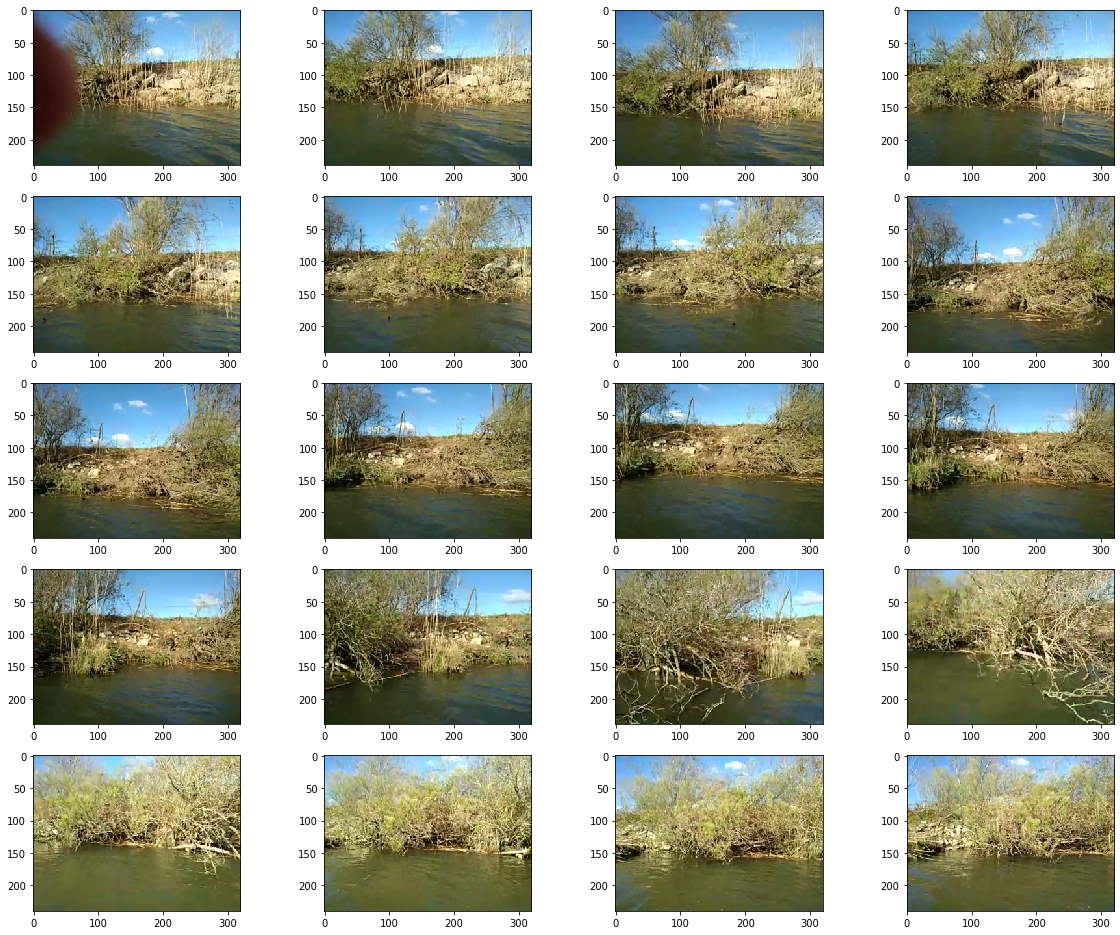

In [54]:
N_images = 20
fig=plt.figure(figsize=(20, 20))
columns = 4
rows = int(N_images/columns)+1
for f_index, frame in enumerate(frames[0:N_images]):
    fig.add_subplot(rows, columns, f_index+1)
    
    plt.imshow(frame["frame"][:,:,::-1], )
plt.show()